# Analysing the evolution of waste recycling in Singapore and future trends for various feedstocks

Singapore is one of the world only city state nations. Boasting a population of roughly 6 million people on a land area approximately the size of Manhattan Island, waste disposal presents a large problem. Conventionally, most waste is disposed of using incineration or landfill. With climate change looming as an ever present threat, Singapore is looking into investing into solutions which allow for sustainability to become a larger part of its waste disposal strategy. 

However, given the expense of separating waste streams and difficulty in recycling mixtures of components, especially plastics or organic matter, certain materials can often be overlooked in this drive. The pace of development comes into question as Singapore is interested in enlarging its population even further. This might mean that waste generation might outgrow recycling rates in the country, negating any benefit of recycling being done in the country. 

This analysis will investigate the recycling and waste production trends for 14 waste sources as a function of the gdp growth of Singapore. The 14 waste streams being analyzed are, Ash and Sludge, Construction and Demolition (C&D), Ferrous metals, Food, Flass, Horticultural Waste, Non-Ferrous metals, others such as ceramics, Paper products, Plastics, Tyres, Textiles, Slag and Wood.  Recyling rate can be both a function of the quantity of waste generated and of increasing recycling capacity as given with the formula, 

$$recycling \space rate = \frac{waste \space recycled}{waste \space generated}$$

Therefore, this analysis will provide insight into where recycling efforts have been lagging and provide predictions on the trajectory that current efforts are taking, in addition to looking at how affluence affects the quantity of waste generated.

*Datasets obtained from Kaggle*

* [GDP Dataset](https://www.kaggle.com/nitishabharathi/gdp-per-capita-all-countries)
* [Waste Dataset](https://www.kaggle.com/kingabzpro/singapore-waste-management)

## Data Processing

Data of the waste generation of Singapore was collected from various authority websites and collated into a file. It was obtained from kaggle.com. Given the haphazard arrangement of the raw data, it will be processed and arranged into the 14 categories discussed earlier. The recycling rate and total waste generated will be normalized for each category, before being combined into a larger dataset. The normalization is performed using the following formula

$$ normalized = \frac{curr \space value}{minval > 0}$$

## Machine Learning Model

The output data in this case is continous as we are dealing with numerical datasets. Therefore, the typs of machine learning models that are most applicable include regression and regularization. Other models can also be used although these 2 are the best. Among regressions, linear and multi-linear regressions will be utilized owing to simplicity of understanding and illustration of key points. Regularization through Ridge Regression will be used to sort out larger dataset if necessary. 

In [326]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error as mse

In [327]:
waste_raw = pd.read_csv(r"/home/nkarthi/citi_workshop/Project/2003_2017_waste.csv", index_col='waste_type')
gdp_raw = pd.read_csv(r"/home/nkarthi/citi_workshop/Project/GDP.csv", index_col = 'Country ')
waste_index = np.unique(waste_raw.index)
waste_cols = waste_raw.columns
gdp_index = np.unique(gdp_raw.index)
gdp_cols = gdp_raw.columns
years = np.unique(waste_raw['year'])
# waste_raw

In [328]:
total_vals = waste_raw.loc[['Total']].sort_values('year')
gdp_sg = gdp_raw.loc[['Singapore']][years.astype(str)]
cols = gdp_sg.columns
d = {'year':[], 'gdp':[]}
for i in cols:
    d['year'].append(i)
    d['gdp'].append(float(gdp_sg[i]))

gdp_sg = pd.DataFrame(d, index = cols)
total_vals['gdp'] = np.array(gdp_sg['gdp'])
# total_vals

In [329]:
def norm_to_one(arr):
    if 0 in arr:
        non_zero = np.where(arr > 0, arr, 0.1)
        vals = np.unique(non_zero)
        min_val = vals[1]
    else:
        vals = np.unique(arr)
        min_val = vals[0]
    return arr/min_val

In [330]:
sorted_dfs = []
dict_dfs = {}
total_tonne = np.array(total_vals['total_waste_generated_tonne'])
sorted_index = []
for i in waste_index:
    if i == 'Total':
        continue
    else:
        curr = waste_raw.loc[[i]].sort_values('year') 
        curr['gdp'] = np.array(gdp_sg['gdp'])
        np.append(waste_index, 'gdp')
        curr = curr.sort_values(by='year')
        curr['normalized_total_waste'] = norm_to_one(np.array(curr['total_waste_generated_tonne']))
        curr['normalized_recycle_rate'] = norm_to_one(np.array(curr['recycling_rate']))
        curr = curr.fillna(0)
        sorted_dfs.append(curr)
        dict_dfs[i] = pd.DataFrame(curr)
        sorted_index.append(i)

merged_df = pd.concat(sorted_dfs, keys = sorted_index)
merged_df.head()

waste_disposed_of_tonne  \
             waste_type                              
Ash & Sludge Ash & Sludge                    88500   
             Ash & Sludge                    93900   
             Ash & Sludge                    98300   
             Ash & Sludge                   126800   
             Ash & Sludge                   124600   

                           total_waste_recycled_tonne  \
             waste_type                                 
Ash & Sludge Ash & Sludge                           0   
             Ash & Sludge                           0   
             Ash & Sludge                           0   
             Ash & Sludge                           0   
             Ash & Sludge                           0   

                           total_waste_generated_tonne  recycling_rate  year  \
             waste_type                                                        
Ash & Sludge Ash & Sludge                        88500             0.0  2003   
             Ash & Sludge                        93900             0.0  2004   
             Ash & Sludge                        98300             0.0  2005   
             Ash & Sludge                       126800             0.0  2006   
             Ash & Sludge                       124600             0.0  2007   

                                   gdp  normalized_total_waste  \
             waste_type                                          
Ash & Sludge Ash & Sludge  46342.29650                1.000000   
             Ash & Sludge  51612.82421                1.061017   
             Ash & Sludge  55809.70032                1.110734   
             Ash & Sludge  60745.45587                1.432768   
             Ash & Sludge  65230.10844                1.407910   

                           normalized_recycle_rate  
             waste_type                             
Ash & Sludge Ash & Sludge                      0.0  
             Ash & Sludge                      0.0  
             Ash & Sludge                      0.0  
             Ash & Sludge                      0.0  
             Ash & Sludge                      0.0

In [331]:
sz = (5,5)

def plot_fit(dfs, x, y, keys, poly_deg = 1, t_sz = 0.5, seed = 42):
    for i, df in enumerate(dfs):
#         poly_fit = PolynomialFeatures(poly_deg)
#         X_train_poly = poly_fit.fit_transform((df[x]))
#         X_train, X_test, y_train, y_test = train_test_split(X_train_poly, df[y], train_size=t_sz,random_state=42)
#         poly_model = LinearRegression().fit(X_train, y_train)
#         y_pred = poly_model.predict(X_test)
#         r2 = metrics.r2_score(y_test, y_pred)
        
        X_train, X_test, y_train, y_test = train_test_split(df[x], df[y], train_size=t_sz,random_state=seed)
        model_linreg = LinearRegression().fit(X_train, y_train)
        y_pred = model_linreg.predict(X_test)
        
        r2 = metrics.r2_score(y_test, y_pred)
        m = model_linreg.coef_
        c = model_linreg.intercept_
        lin_eqs = []
        
        for j in range(0, len(m)):
            lin_eq = r'y = {0:.2e}x + {1:.3f}'.format(m[j], c)
            fit = r'$R^{2}$ = ' + '{:.3f}'.format(r2)
            lin_eqs.append(lin_eq + ", "+fit)
        lin_eqs = np.array(lin_eqs)
        
        fig = plt.figure(i)
        ax = fig.add_subplot(111)
        ax.plot(X_test, y_test, 'bx', label = 'Test data')
        ax.plot(X_test, y_pred, 'r^', label = lin_eqs)
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_title(keys[i])
        ax.legend(loc = 'upper left')
#         plt.text(0.3, 0.9, lin_eq + ", "+fit, transform=ax.transAxes)
        plt.show()

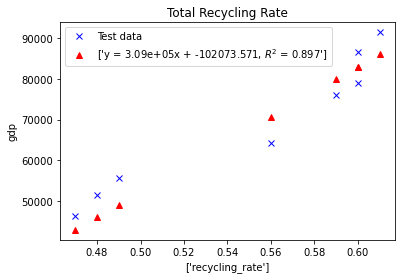

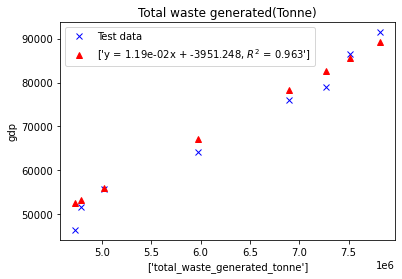

In [332]:
plot_fit([total_vals], ['recycling_rate'], 'gdp', ['Total Recycling Rate'])
plot_fit([total_vals], ['total_waste_generated_tonne'], 'gdp', ['Total waste generated(Tonne)'])

From the plots above, it can be seen how GDP relates to the total recycling rate and waste generation in Singapore. The fit is relatively good, with an $R^2 = 0.811$ when comparing recycling rate to gdp and $R^2 = 0.975$ when comparing the total waste generated to the gdp, indicating that one could assume that as GDP increases, the total recycling rate and waste generation will. From the quality of the fit for the latter figure, a linear fit works pretty well to describe the general trend of movement. However, for the recycling rate, there are other confounding factors that deserve closer inspection of each individual source. First, we will look at the evolution of how recycling rate and waste generation have changed for all sources. 

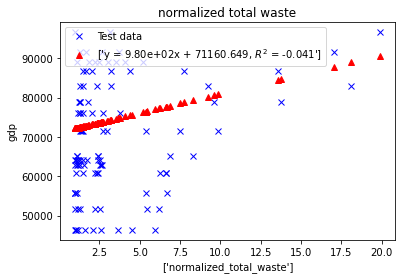

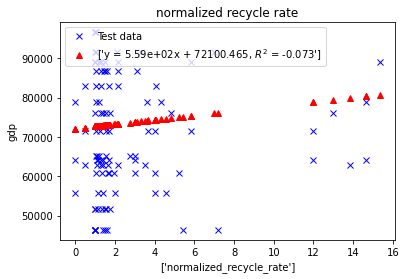

In [333]:
plot_fit([merged_df], ['normalized_total_waste'], 'gdp', ['normalized total waste'], t_sz = 0.5)
plot_fit([merged_df], ['normalized_recycle_rate'], 'gdp', ['normalized recycle rate'], t_sz = 0.5)

When analyzing the entire dataset, we can see that a linear fit is not working well owing to the negative $R^2$ scores when comparing the normalized total waste generated and recycle rates. A negative $R^2$ score indicates that the trend is better described with a horizontal line. This might be due to the large differences in the recycle rates and waste generated for various categories. Thus, each individual category of waste will be analyzed to see how the fit changes. 

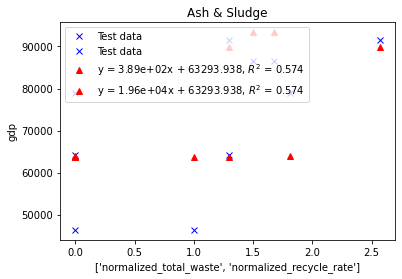

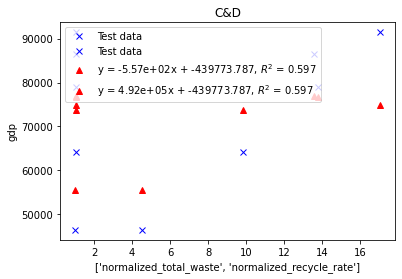

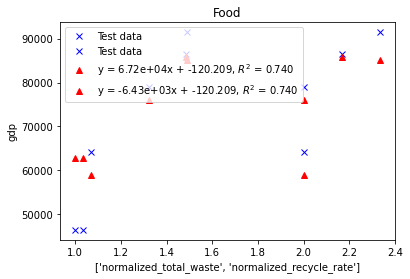

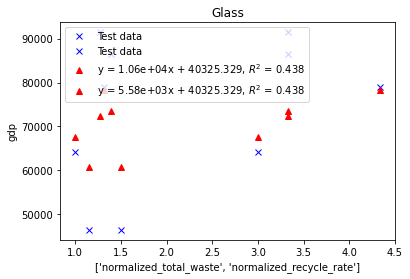

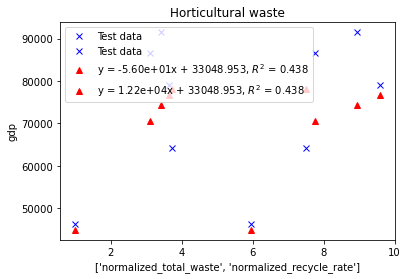

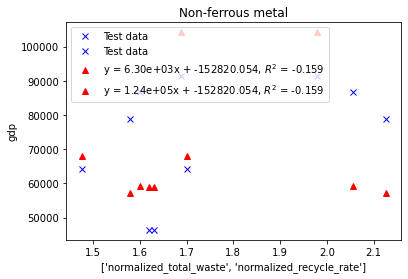

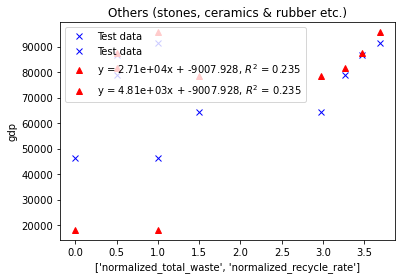

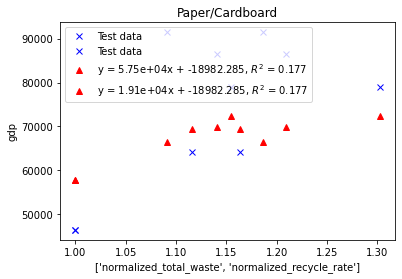

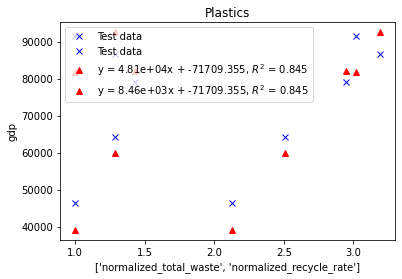

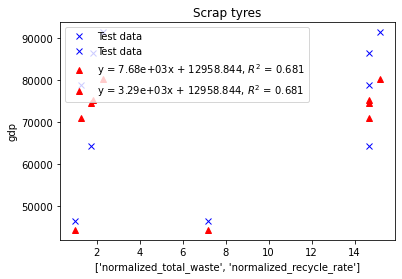

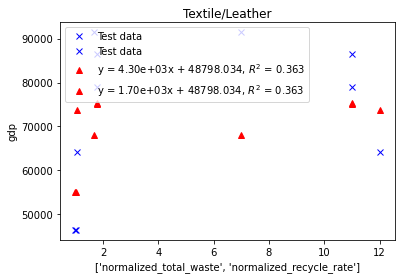

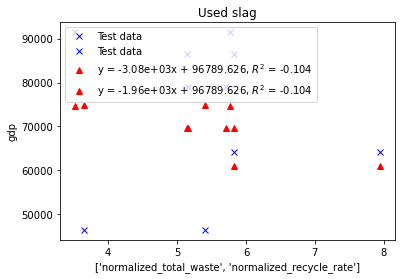

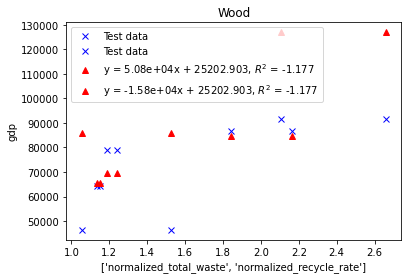

In [334]:
plot_fit(sorted_dfs, ['normalized_total_waste', 'normalized_recycle_rate'], 'gdp', sorted_index, t_sz = 0.7)

It can be seen that in general, as the recycling rate increases, the gdp does as well. This does not hold true for wood, used slag, and non ferrous metals owing to their $R^2 < 0$. The different slopes on each, sometimes varying by orers of magnitude also show the differences that impact the fit obtained in the figures above when comparing all the data sets.

In [338]:
n_lambda = 100
lambdas = np.logspace(-2,6, n_lambda)
t_sz = 0.7

X_train, X_test, y_train, y_test = train_test_split(merged_df[['normalized_recycle_rate', 'normalized_total_waste']], merged_df['gdp'], train_size=t_sz,random_state=42)

MSE_train = []
MSE_test = []
coefs = []

for ld in lambdas:
    ridgecv = RidgeCV(alphas = [ld], normalize = True)
    model_RR = ridgecv.fit(X_train, y_train)
    y_predRR_cv_train = model_RR.predict(X_train)
    y_predRR_cv_test = model_RR.predict(X_test)
    MSE_train.append(mse(y_train, y_predRR_cv_train))
    MSE_test.append(mse(y_test, y_predRR_cv_test))
    coefs.append(model_RR.coef_)

coef_df = pd.DataFrame(coefs)
coef_df.columns = X_train.columns

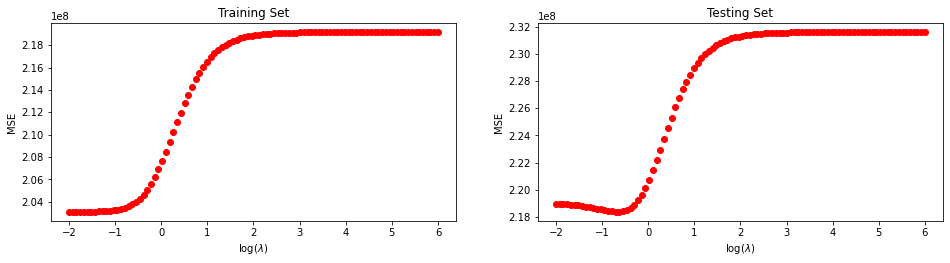

In [339]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=False)

ax1 = plt.subplot(221)
ax1.scatter(np.log10(lambdas), MSE_train,color="red")
ax1.set_title("Training Set")
ax2 = plt.subplot(222)
ax2.scatter(np.log10(lambdas), MSE_test,color="red")
ax2.set_title("Testing Set")

ax1.set_xlabel("log($\\lambda$)")
ax2.set_xlabel("log($\\lambda$)")
ax1.set_ylabel('MSE')
ax2.set_ylabel('MSE')

plt.show()

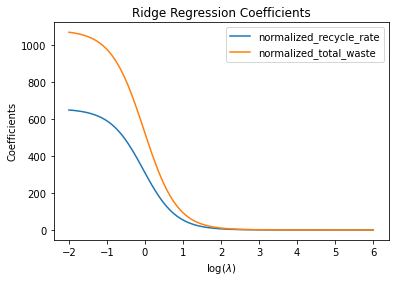

In [340]:
ax = plt.gca()
for i in range(0,coef_df.columns.size):
    ax.plot(np.log10(lambdas), coef_df.iloc[:,i])
    
ax.legend(coef_df.columns)
plt.xlabel("log($\\lambda$)")
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.axis('tight')
plt.show()

From the RR analysis of the normalized waste generated and recycling rates, it can be seen that there appears to be a weak correlation between independant waste streams and gdp as can be seen from the large MSE obtained between the training and testing sets. 